## Comparing Housing Market "Hotness": Dallas vs Austin

In [59]:
# Import dependencies
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [60]:
# Load the csv file
austin_dallas_housing_df = pd.read_csv("newdata.csv",encoding='utf-8')
austin_dallas_housing_df.head(10)


,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Austin,Texas,Feb-12,$190K,5.60%,2.20%,"1,403",18.60%,16.60%,"2,569",...,10.40%,"6,941",1.20%,-21.50%,74,0,-18,96.70%,0.40%,0.10%
1,Austin,Texas,Mar-12,$200K,5.10%,8.70%,"2,076",48.00%,18.60%,"3,400",...,-3.00%,"7,394",6.50%,-23.10%,58,-16,-26,97.30%,0.60%,0.90%
2,Austin,Texas,Apr-12,$205K,2.70%,7.90%,"2,120",2.10%,14.80%,"3,379",...,1.40%,"7,698",4.10%,-24.00%,39,-19,-21,97.70%,0.40%,1.00%
3,Austin,Texas,May-12,$210K,2.40%,9.10%,"2,584",21.90%,25.10%,"3,493",...,11.80%,"7,908",2.70%,-22.50%,36,-3,-18,97.60%,0.00%,1.00%
4,Austin,Texas,Jun-12,$214K,2.00%,8.70%,"2,842",10.00%,21.00%,"3,396",...,8.80%,"8,152",3.10%,-20.30%,31,-5,-21,97.80%,0.20%,1.10%
5,Austin,Texas,Jul-12,$210K,-1.90%,10.20%,"2,586",-9.00%,20.30%,"2,939",...,7.20%,"8,068",-1.00%,-18.70%,34,3,-21,97.80%,-0.10%,0.90%
6,Austin,Texas,Aug-12,$209K,-0.50%,8.60%,"2,585",0.00%,17.50%,"2,709",...,15.80%,"7,669",-4.90%,-17.60%,38,4,-23,97.60%,-0.10%,1.00%
7,Austin,Texas,Sep-12,$197K,-6.00%,5.10%,"1,991",-23.00%,10.90%,"2,107",...,1.50%,"7,250",-5.50%,-16.50%,43,5,-20,97.40%,-0.20%,0.90%
8,Austin,Texas,Oct-12,$199K,1.40%,5.40%,"2,157",8.30%,38.70%,"2,234",...,6.90%,"6,773",-6.60%,-18.30%,50,7,-16,97.20%,-0.20%,0.50%
9,Austin,Texas,Nov-12,$199K,0.00%,7.70%,"1,812",-16.00%,23.60%,"1,933",...,10.40%,"6,236",-7.90%,-18.60%,48,-2,-22,97.30%,0.10%,0.60%


In [61]:
#Show data counts
austin_dallas_housing_df.count()

City                         262
State                        262
Month of Period End          262
Median Sale Price            262
Median Sale Price MoM        262
Median Sale Price YoY        262
Homes Sold                   262
Homes Sold MoM               262
Homes Sold YoY               262
New Listings                 262
New Listings MoM             262
New Listings YoY             262
Inventory                    262
Inventory MoM                262
 Inventory YoY               262
Days on Market               262
Days on Market MoM           262
Days on Market YoY           262
Average Sale To List         262
Average Sale To List MoM     262
Average Sale To List YoY     262
dtype: int64

In [62]:
#Separating Austin data to new data frame
austin_data = austin_dallas_housing_df.loc[austin_dallas_housing_df["City"] == "Austin"]
austin_data

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Austin,Texas,Feb-12,$190K,5.60%,2.20%,"1,403",18.60%,16.60%,"2,569",...,10.40%,"6,941",1.20%,-21.50%,74,0,-18,96.70%,0.40%,0.10%
1,Austin,Texas,Mar-12,$200K,5.10%,8.70%,"2,076",48.00%,18.60%,"3,400",...,-3.00%,"7,394",6.50%,-23.10%,58,-16,-26,97.30%,0.60%,0.90%
2,Austin,Texas,Apr-12,$205K,2.70%,7.90%,"2,120",2.10%,14.80%,"3,379",...,1.40%,"7,698",4.10%,-24.00%,39,-19,-21,97.70%,0.40%,1.00%
3,Austin,Texas,May-12,$210K,2.40%,9.10%,"2,584",21.90%,25.10%,"3,493",...,11.80%,"7,908",2.70%,-22.50%,36,-3,-18,97.60%,0.00%,1.00%
4,Austin,Texas,Jun-12,$214K,2.00%,8.70%,"2,842",10.00%,21.00%,"3,396",...,8.80%,"8,152",3.10%,-20.30%,31,-5,-21,97.80%,0.20%,1.10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Austin,Texas,Aug-22,$500K,-3.80%,5.50%,"2,872",3.10%,-24.00%,"3,672",...,-14.90%,"10,739",-0.20%,77.90%,40,6,10,98.90%,-1.30%,-5.10%
127,Austin,Texas,Sep-22,$475K,-5.00%,5.60%,"2,880",0.30%,-21.10%,"3,528",...,-11.50%,"10,827",0.80%,77.30%,47,7,15,98.30%,-0.60%,-3.90%
128,Austin,Texas,Oct-22,$475K,0.00%,3.70%,"2,235",-22.40%,-29.60%,"2,739",...,-26.10%,"10,291",-5.00%,70.30%,53,6,19,97.30%,-1.00%,-4.40%
129,Austin,Texas,Nov-22,$470K,-1.10%,-0.20%,"1,986",-11.10%,-38.30%,"2,015",...,-30.50%,"9,132",-11.30%,77.30%,61,8,26,96.50%,-0.90%,-4.80%


In [63]:
#Separating Dallas information to new data frame
dallas_data = austin_dallas_housing_df.loc[austin_dallas_housing_df["City"] == "Dallas"]
dallas_data

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
131,Dallas,Texas,Feb-12,$160K,4.70%,1.30%,"2,998",20.80%,22.80%,"5,533",...,15.70%,"17,066",4.20%,-22.90%,83,-2,-15,96.40%,0.20%,0.20%
132,Dallas,Texas,Mar-12,$168K,4.70%,8.80%,"3,979",32.70%,12.60%,"6,607",...,-5.30%,"17,862",4.70%,-22.80%,63,-20,-24,96.60%,0.30%,0.60%
133,Dallas,Texas,Apr-12,$169K,0.90%,5.80%,"4,202",5.60%,13.70%,"6,303",...,-4.90%,"18,194",1.90%,-23.60%,49,-14,-23,97.00%,0.40%,0.90%
134,Dallas,Texas,May-12,$178K,5.30%,7.80%,"4,919",17.10%,23.10%,"6,437",...,8.50%,"18,225",0.20%,-22.90%,49,0,-21,97.10%,0.10%,0.80%
135,Dallas,Texas,Jun-12,$180K,1.20%,8.40%,"5,089",3.50%,13.80%,"6,227",...,0.10%,"18,412",1.00%,-22.00%,49,0,-21,97.40%,0.30%,1.10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Dallas,Texas,Aug-22,$430K,-1.10%,13.90%,"6,128",6.90%,-11.50%,"6,879",...,-7.10%,"13,765",-2.70%,47.50%,25,6,7,99.70%,-1.80%,-2.70%
258,Dallas,Texas,Sep-22,$420K,-2.30%,12.00%,"5,450",-11.10%,-17.90%,"6,459",...,-4.70%,"13,887",0.90%,54.60%,32,7,11,98.70%,-1.00%,-2.80%
259,Dallas,Texas,Oct-22,$420K,0.00%,11.10%,"4,573",-16.10%,-26.30%,"5,564",...,-9.30%,"13,714",-1.20%,67.80%,33,1,11,98.50%,-0.20%,-2.80%
260,Dallas,Texas,Nov-22,$410K,-2.40%,8.30%,"4,064",-11.10%,-30.50%,"4,439",...,-14.10%,"12,697",-7.40%,83.90%,37,4,16,97.90%,-0.60%,-3.60%


In [64]:
#Check data types for each column
austin_data.dtypes

City                         object
State                        object
Month of Period End          object
Median Sale Price            object
Median Sale Price MoM        object
Median Sale Price YoY        object
Homes Sold                   object
Homes Sold MoM               object
Homes Sold YoY               object
New Listings                 object
New Listings MoM             object
New Listings YoY             object
Inventory                    object
Inventory MoM                object
 Inventory YoY               object
Days on Market                int64
Days on Market MoM            int64
Days on Market YoY            int64
Average Sale To List         object
Average Sale To List MoM     object
Average Sale To List YoY     object
dtype: object

In [65]:
#Get rid of '$' and 'K' from Median Price column. Change column type to a float to prepare for graphing.
austin_data["Median Sale Price"] = austin_data["Median Sale Price"].str.replace("$", "")
austin_data["Median Sale Price"] = austin_data["Median Sale Price"].str.replace("K", "")
austin_data["Median Sale Price"] = austin_data["Median Sale Price"].astype(float)
austin_data.head()


,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Austin,Texas,Feb-12,190.0,5.60%,2.20%,"1,403",18.60%,16.60%,"2,569",...,10.40%,"6,941",1.20%,-21.50%,74,0,-18,96.70%,0.40%,0.10%
1,Austin,Texas,Mar-12,200.0,5.10%,8.70%,"2,076",48.00%,18.60%,"3,400",...,-3.00%,"7,394",6.50%,-23.10%,58,-16,-26,97.30%,0.60%,0.90%
2,Austin,Texas,Apr-12,205.0,2.70%,7.90%,"2,120",2.10%,14.80%,"3,379",...,1.40%,"7,698",4.10%,-24.00%,39,-19,-21,97.70%,0.40%,1.00%
3,Austin,Texas,May-12,210.0,2.40%,9.10%,"2,584",21.90%,25.10%,"3,493",...,11.80%,"7,908",2.70%,-22.50%,36,-3,-18,97.60%,0.00%,1.00%
4,Austin,Texas,Jun-12,214.0,2.00%,8.70%,"2,842",10.00%,21.00%,"3,396",...,8.80%,"8,152",3.10%,-20.30%,31,-5,-21,97.80%,0.20%,1.10%


In [66]:
#Get rid of '$' and 'K' from Median Price column. Change column type to a float to prepare for graphing.
dallas_data["Median Sale Price"] = dallas_data["Median Sale Price"].str.replace("$", "")
dallas_data["Median Sale Price"] = dallas_data["Median Sale Price"].str.replace("K", "")
dallas_data["Median Sale Price"] = dallas_data["Median Sale Price"].astype(float)
dallas_data.head()

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
131,Dallas,Texas,Feb-12,160.0,4.70%,1.30%,"2,998",20.80%,22.80%,"5,533",...,15.70%,"17,066",4.20%,-22.90%,83,-2,-15,96.40%,0.20%,0.20%
132,Dallas,Texas,Mar-12,168.0,4.70%,8.80%,"3,979",32.70%,12.60%,"6,607",...,-5.30%,"17,862",4.70%,-22.80%,63,-20,-24,96.60%,0.30%,0.60%
133,Dallas,Texas,Apr-12,169.0,0.90%,5.80%,"4,202",5.60%,13.70%,"6,303",...,-4.90%,"18,194",1.90%,-23.60%,49,-14,-23,97.00%,0.40%,0.90%
134,Dallas,Texas,May-12,178.0,5.30%,7.80%,"4,919",17.10%,23.10%,"6,437",...,8.50%,"18,225",0.20%,-22.90%,49,0,-21,97.10%,0.10%,0.80%
135,Dallas,Texas,Jun-12,180.0,1.20%,8.40%,"5,089",3.50%,13.80%,"6,227",...,0.10%,"18,412",1.00%,-22.00%,49,0,-21,97.40%,0.30%,1.10%


In [67]:
#Create data frame that contains only years 2018 to 2022 for graphing
austin_2018_2022 = austin_data.iloc[71:131]
austin_2018_2022

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
71,Austin,Texas,Jan-18,291.0,-4.60%,4.10%,"1,845",-37.70%,8.30%,"2,523",...,-4.90%,"5,921",-5.70%,3.60%,48,-5,5,97.90%,0.00%,-0.20%
72,Austin,Texas,Feb-18,295.0,1.40%,2.10%,"2,239",21.40%,7.00%,"3,149",...,2.00%,"6,172",4.20%,2.10%,52,4,10,98.20%,0.30%,-0.10%
73,Austin,Texas,Mar-18,300.0,1.70%,1.70%,"3,032",35.40%,9.10%,"4,235",...,-2.30%,"6,850",11.00%,-0.20%,31,-21,8,98.50%,0.30%,0.00%
74,Austin,Texas,Apr-18,315.0,5.00%,4.70%,"2,996",-1.20%,6.60%,"4,432",...,5.20%,"7,419",8.30%,-0.90%,21,-10,4,98.80%,0.30%,-0.10%
75,Austin,Texas,May-18,318.0,1.00%,4.20%,"3,658",22.10%,6.00%,"4,686",...,2.70%,"8,135",9.70%,1.80%,20,-1,1,98.80%,0.00%,0.10%
76,Austin,Texas,Jun-18,321.0,0.90%,4.30%,"3,721",1.70%,-1.60%,"4,328",...,-3.40%,"8,646",6.30%,0.00%,22,2,0,98.80%,0.00%,0.10%
77,Austin,Texas,Jul-18,315.0,-1.90%,5.70%,"3,473",-6.70%,6.90%,"3,855",...,-1.70%,"8,760",1.30%,-1.90%,26,4,4,98.60%,-0.20%,0.10%
78,Austin,Texas,Aug-18,317.0,0.60%,7.40%,"3,357",-3.30%,2.60%,"3,850",...,15.30%,"8,959",2.30%,1.90%,32,6,3,98.30%,-0.30%,0.00%
79,Austin,Texas,Sep-18,300.0,-5.30%,3.80%,"2,607",-22.30%,-2.80%,"2,856",...,1.00%,"8,809",-1.70%,4.90%,35,3,0,98.10%,-0.20%,0.00%
80,Austin,Texas,Oct-18,305.0,1.70%,5.30%,"2,604",-0.10%,4.30%,"2,888",...,1.80%,"8,473",-3.80%,7.50%,43,8,2,98.10%,-0.10%,0.00%


In [68]:
#Create data frame that contains only years 2018 to 2022 for graphing
dallas_2018_2022 =dallas_data.iloc[71:131]
dallas_2018_2022

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
202,Dallas,Texas,Jan-18,264.0,-5.90%,5.40%,"3,669",-33.50%,3.80%,"5,839",...,4.70%,"12,167",3.30%,12.30%,46,1,8,97.90%,0.00%,-0.30%
203,Dallas,Texas,Feb-18,280.0,6.30%,5.30%,"4,343",18.40%,5.00%,"6,032",...,-0.50%,"12,585",3.40%,10.70%,40,-6,5,98.30%,0.40%,-0.10%
204,Dallas,Texas,Mar-18,289.0,3.20%,5.10%,"5,687",30.90%,-0.70%,"7,967",...,-2.40%,"13,953",10.90%,10.30%,31,-9,4,98.50%,0.20%,-0.40%
205,Dallas,Texas,Apr-18,285.0,-1.40%,1.80%,"5,678",-0.20%,3.50%,"8,477",...,16.00%,"15,214",9.00%,15.20%,28,-3,4,98.80%,0.30%,-0.50%
206,Dallas,Texas,May-18,295.0,3.50%,1.70%,"6,702",18.00%,1.50%,"8,961",...,6.20%,"16,659",9.50%,17.60%,28,0,3,98.80%,0.00%,-0.50%
207,Dallas,Texas,Jun-18,300.0,1.70%,3.40%,"6,775",1.10%,-1.10%,"9,042",...,4.80%,"18,265",9.60%,17.40%,29,1,3,98.70%,-0.10%,-0.50%
208,Dallas,Texas,Jul-18,295.0,-1.70%,5.00%,"6,361",-6.10%,2.40%,"7,951",...,1.90%,"18,622",2.00%,16.10%,32,3,5,98.50%,-0.20%,-0.60%
209,Dallas,Texas,Aug-18,289.0,-2.10%,3.80%,"6,407",0.70%,-3.00%,"7,424",...,0.70%,"18,648",0.10%,16.60%,37,5,7,98.20%,-0.30%,-0.60%
210,Dallas,Texas,Sep-18,280.0,-3.00%,3.70%,"4,902",-23.50%,-10.20%,"6,193",...,-3.20%,"18,616",-0.20%,17.00%,40,3,6,98.20%,0.00%,-0.30%
211,Dallas,Texas,Oct-18,275.0,-1.80%,0.00%,"4,948",0.90%,-3.10%,"6,221",...,3.50%,"18,333",-1.50%,19.30%,45,5,7,98.00%,-0.20%,-0.20%


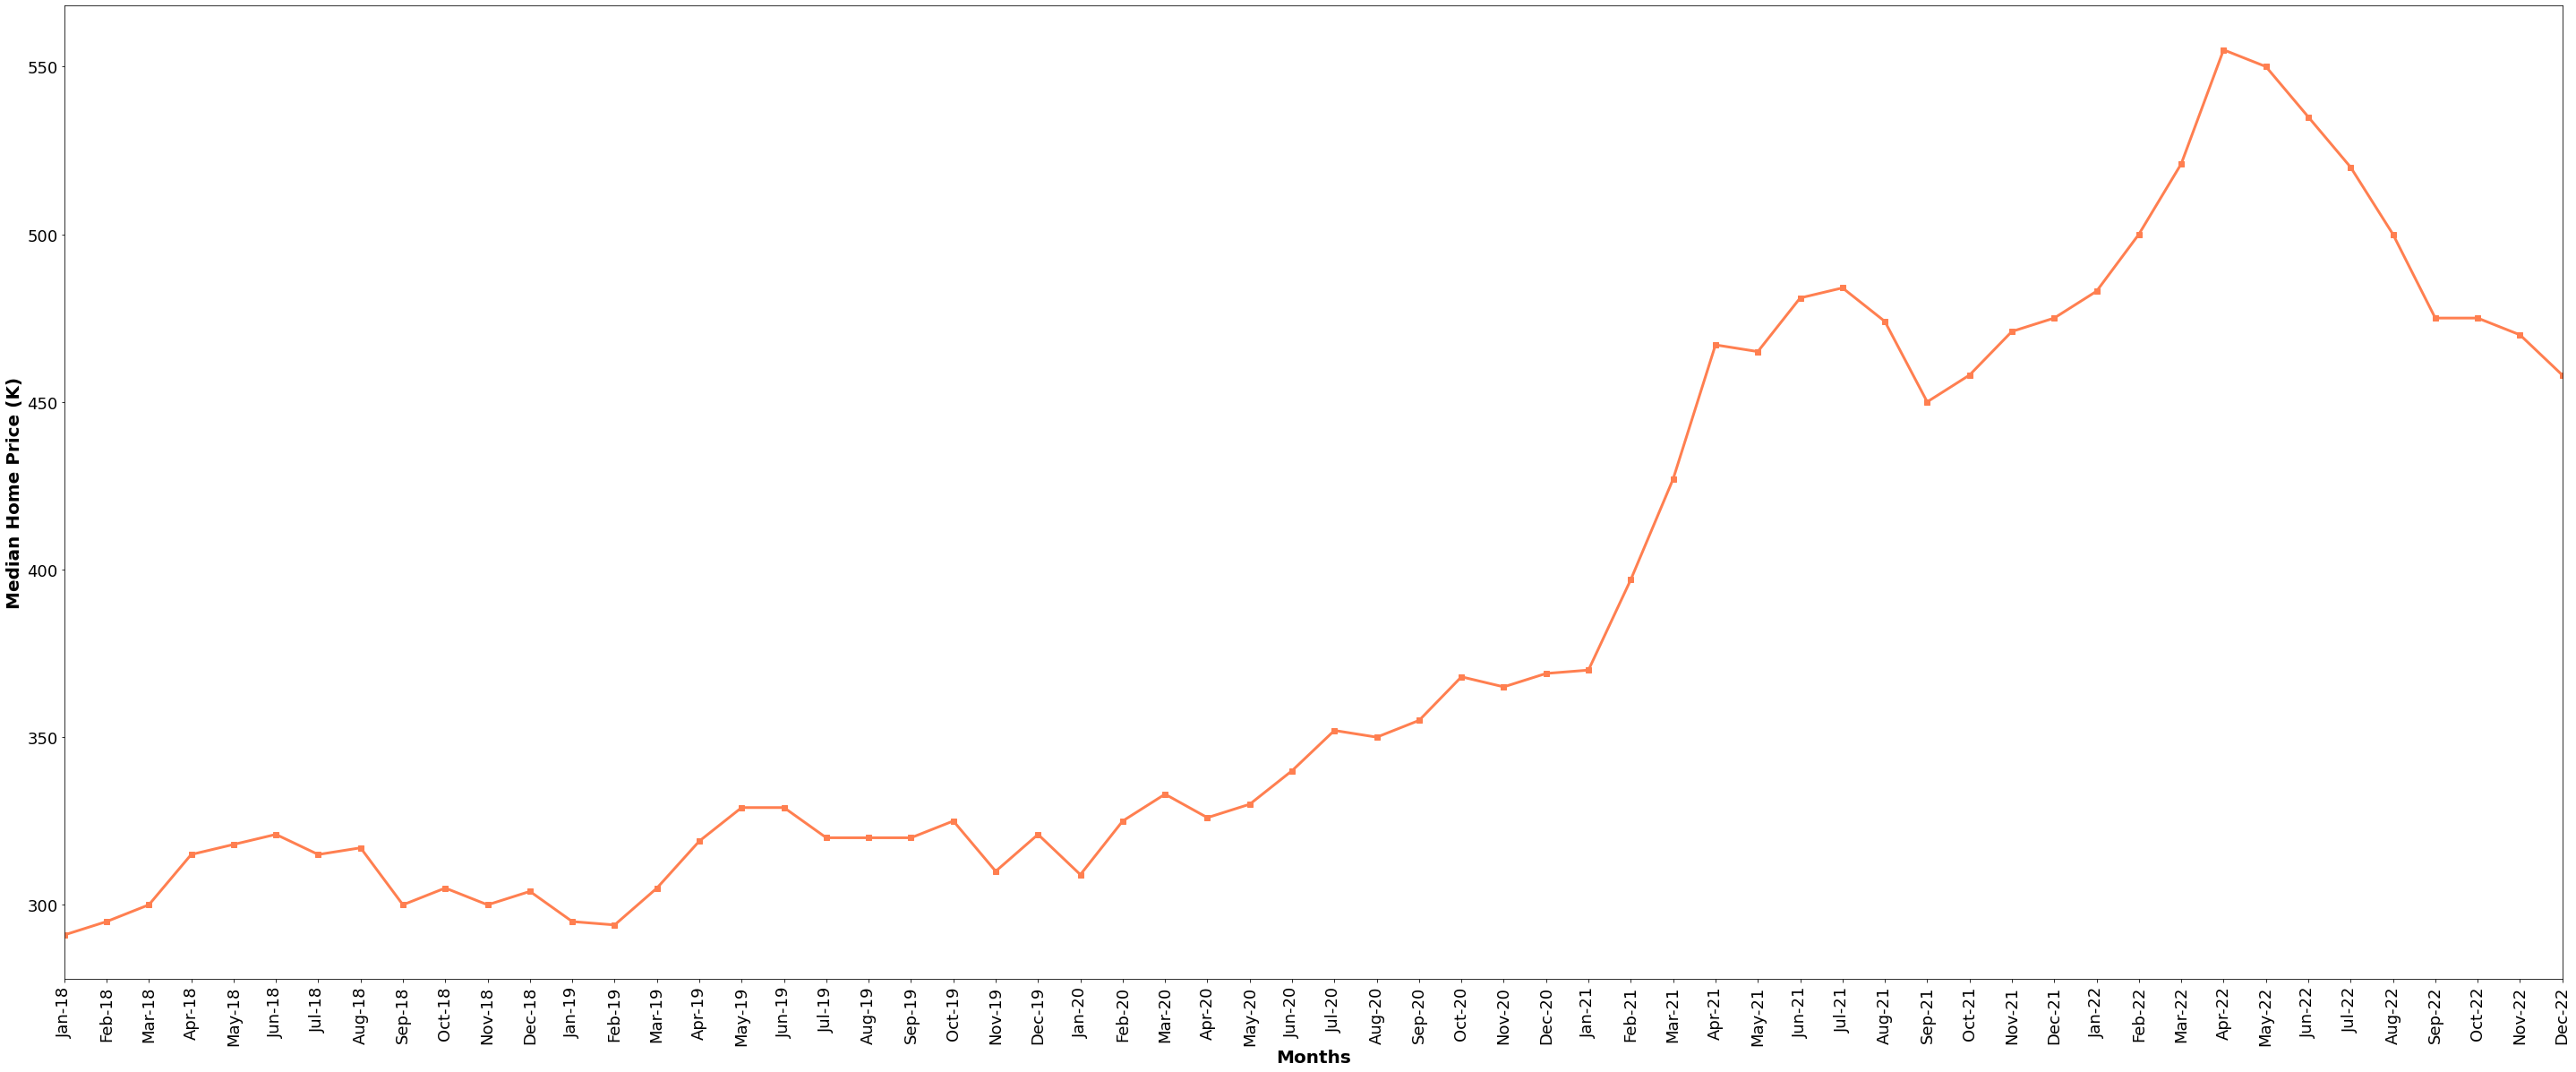

In [69]:
#Test line graph using just austin data to get formatting and test other graph properties
import matplotlib
plt.figure(figsize= (50,20))
plt.plot(austin_2018_2022["Month of Period End"], austin_2018_2022["Median Sale Price"], marker="s", linewidth=3, color= "coral")
plt.xticks(austin_2018_2022["Month of Period End"], rotation=90, fontsize= 18)
matplotlib.rc("ytick", labelsize=18)
plt.xlabel("Months", fontsize = 20, fontweight= "bold")
plt.ylabel("Median Home Price (K)", fontsize = 20, fontweight= "bold")
plt.xlim("Jan-18", "Dec-22")
plt.show()

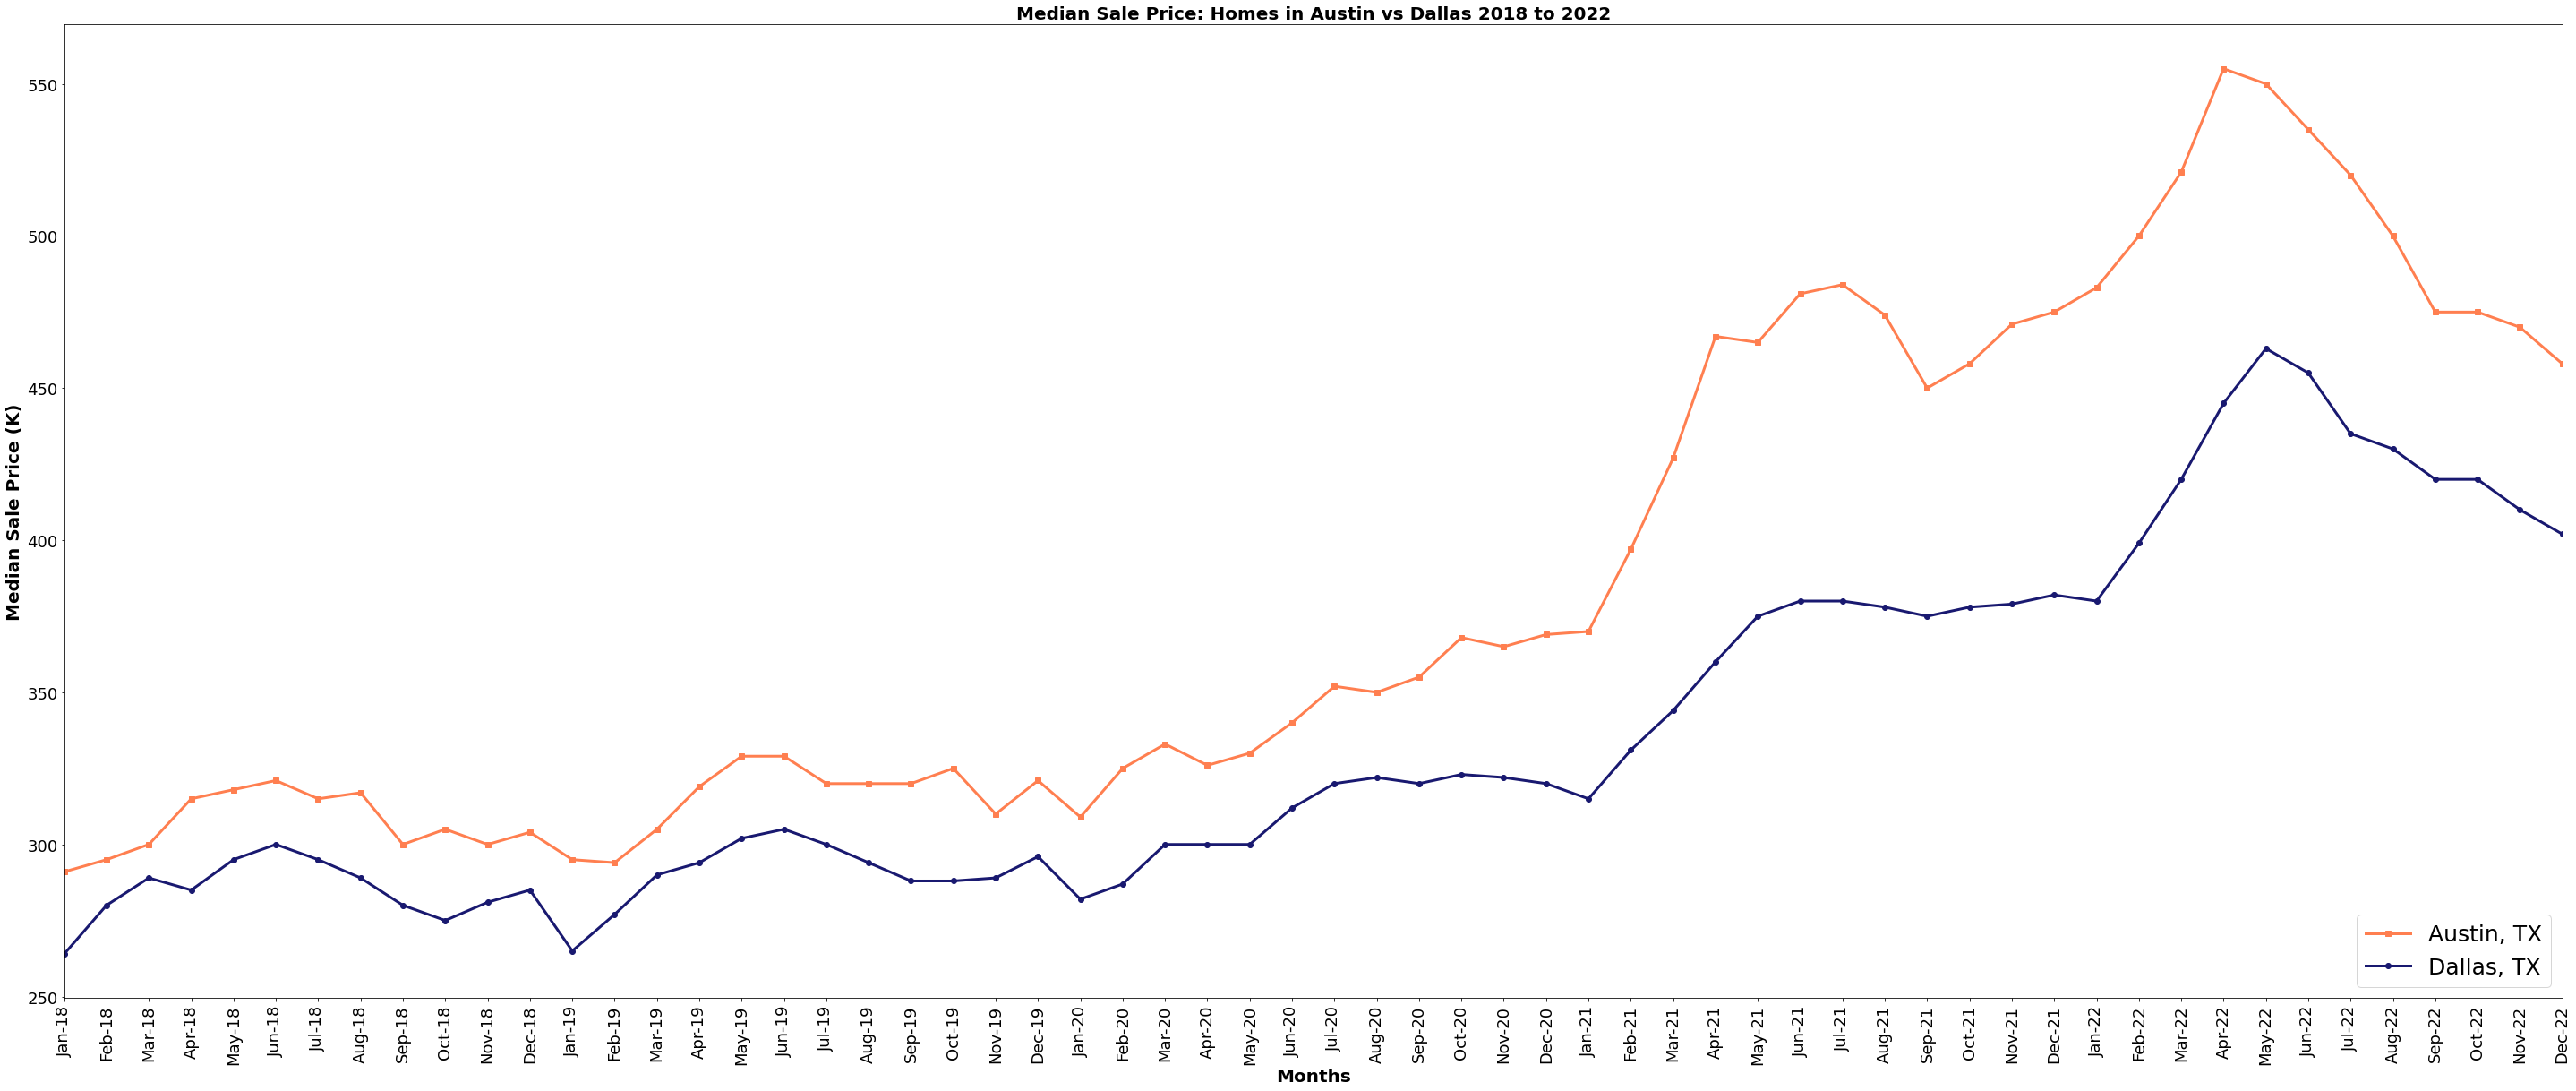

In [70]:
#Create line graph that contains both Austin and Dallas median sale price for 2012-2022
import matplotlib
plt.figure(figsize= (50,20))
plt.plot(austin_2018_2022["Month of Period End"], austin_2018_2022["Median Sale Price"], marker="s", linewidth=3, color= "coral", label= "Austin, TX")
plt.plot(dallas_2018_2022["Month of Period End"], dallas_2018_2022["Median Sale Price"], marker= "o", linewidth=3, color= "midnightblue", label= "Dallas, TX")
plt.xticks(austin_2018_2022["Month of Period End"], rotation=90, fontsize= 18)
matplotlib.rc("ytick", labelsize=18)
plt.xlabel("Months", fontsize = 20, fontweight= "bold")
plt.ylabel("Median Sale Price (K)", fontsize = 20, fontweight= "bold")
plt.xlim("Jan-18", "Dec-22")
plt.legend(fontsize= "25", loc = "lower right")
plt.title("Median Sale Price: Homes in Austin vs Dallas 2018 to 2022", fontsize=20, fontweight="bold")
plt.show()

## Linear Regression


#### Inventory vs Median Sale Price Linear Regression Plot
###### Does housing price increase when inventory decreases?

In [71]:
#Get rid of commas in Inventory column
austin_2018_2022["Inventory"] = austin_2018_2022["Inventory"].str.replace(",", "")
#Convert columns to integers
austin_2018_2022["Inventory"] = austin_2018_2022["Inventory"].astype(int)

In [94]:
austin_2018_2022["Inventory"].describe()

count       60.000000
mean      6635.200000
std       1958.958914
min       3049.000000
25%       5661.750000
50%       6619.500000
75%       8018.250000
max      10827.000000
Name: Inventory, dtype: float64

The r-squared is: 0.016148557922311284
The correlation between both factors is -0.13


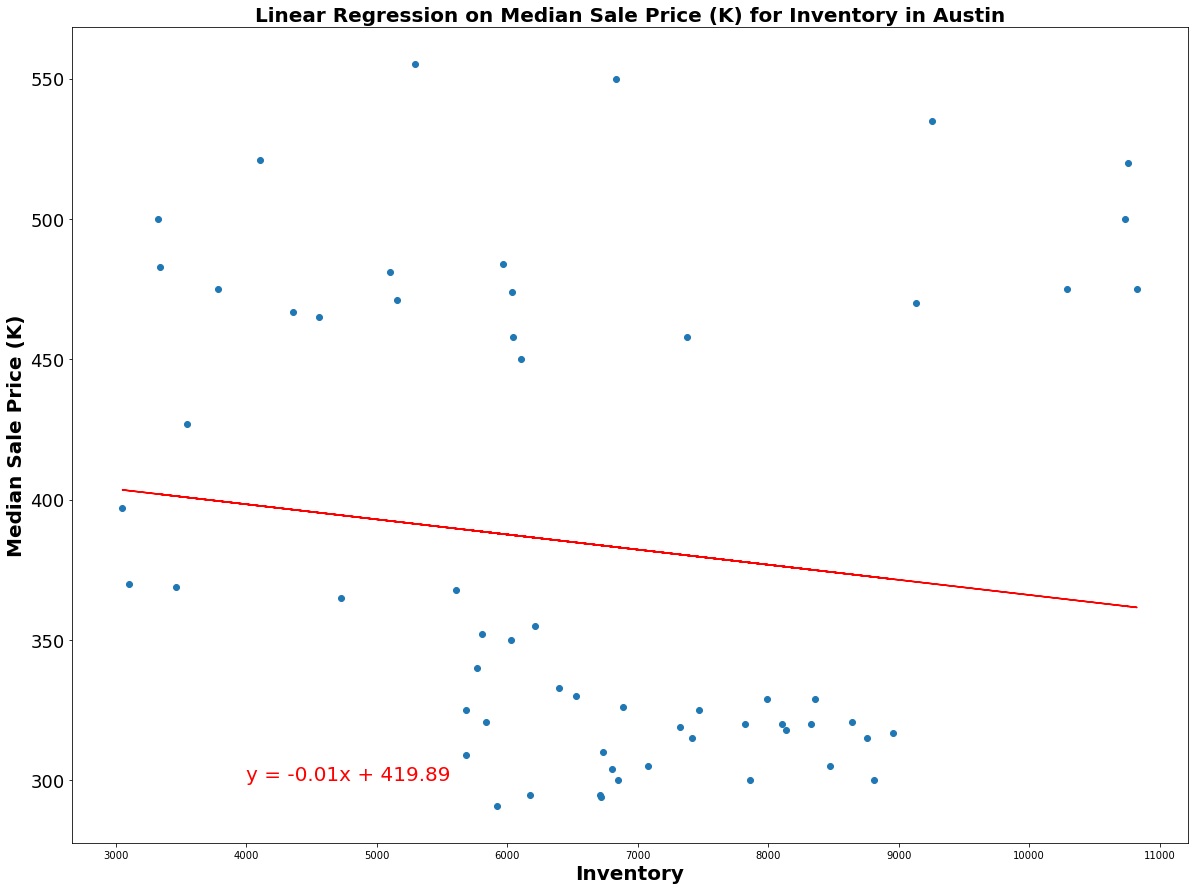

In [89]:
import scipy.stats as st
#Linear regression for Austin
x_values = austin_2018_2022["Inventory"]
y_values = austin_2018_2022["Median Sale Price"]
#Add linear regression equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4000, 300),fontsize=20,color="red")
plt.xlabel("Inventory", fontsize = 20, fontweight= "bold")
plt.ylabel("Median Sale Price (K)", fontsize = 20, fontweight= "bold")
plt.title("Linear Regression on Median Sale Price (K) for Inventory in Austin", fontsize = 20, fontweight= "bold")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [73]:
#Get rid of commas in Inventory column
dallas_2018_2022["Inventory"] = dallas_2018_2022["Inventory"].str.replace(",", "")
#Convert columns to integers
dallas_2018_2022["Inventory"] = dallas_2018_2022["Inventory"].astype(int)

In [93]:
dallas_2018_2022["Inventory"].describe()

count       60.000000
mean     13343.266667
std       4611.652896
min       5002.000000
25%       9169.000000
50%      13920.000000
75%      16914.500000
max      20883.000000
Name: Inventory, dtype: float64

The r-squared is: 0.39554686201731126
The correlation between both factors is -0.63


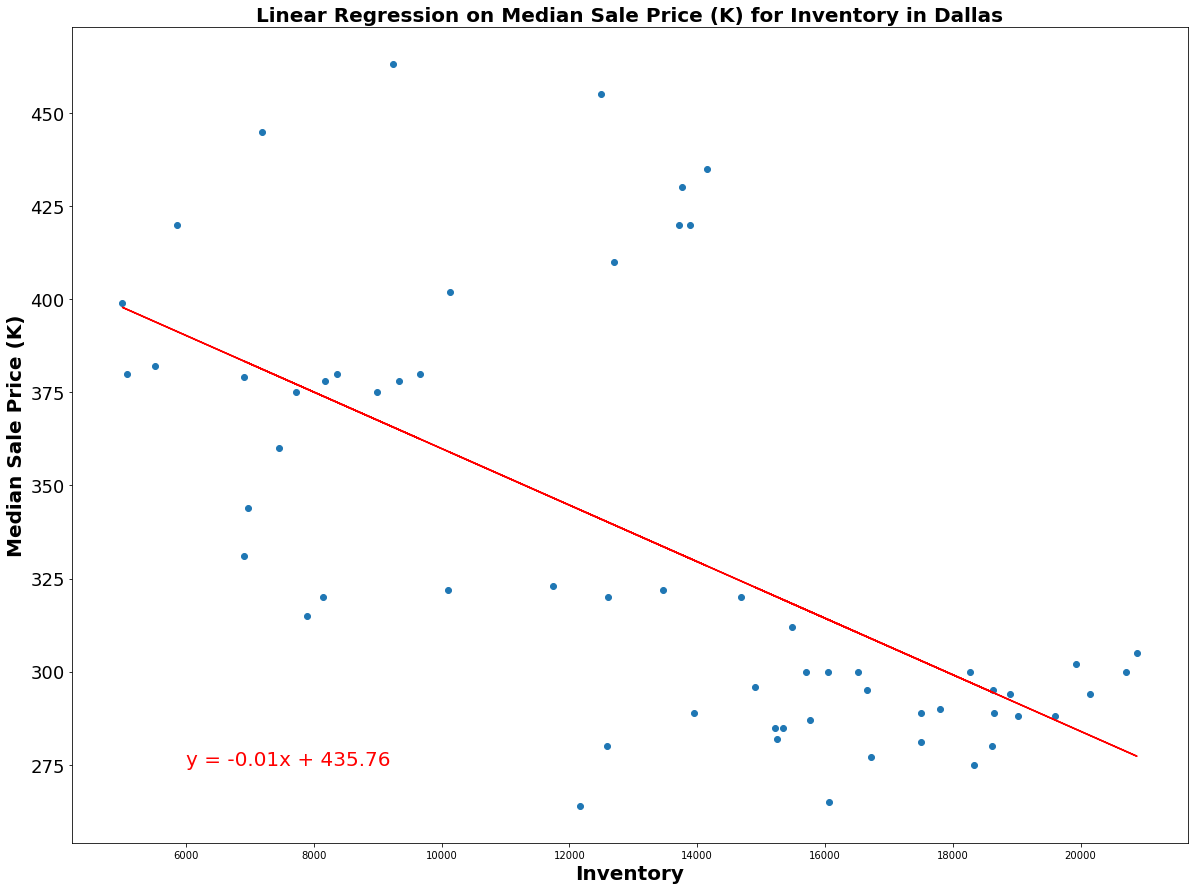

In [90]:
import scipy.stats as st
#Linear regression for Dallas
x_values = dallas_2018_2022["Inventory"]
y_values = dallas_2018_2022["Median Sale Price"]
#Add linear regression equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6000, 275),fontsize=20,color="red")
plt.xlabel("Inventory", fontsize = 20, fontweight= "bold")
plt.ylabel("Median Sale Price (K)", fontsize = 20, fontweight= "bold")
plt.title("Linear Regression on Median Sale Price (K) for Inventory in Dallas", fontsize = 20, fontweight= "bold")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

Discussion about the linear relationship for Inventory vs Median Sale Price (K):
* When using the data from January 2018 to December 2022 in Austin there does not seem to a relationship (positive or negative) between housing availability (Inventory) and Median Sale Price. It may be expected that the less homes that are available, the higher the sale price would be, however the plot and r-squared value (0.016148557922311284) show that there is no correlation between these two factors in the Austin metro area for the given time frame. This may be due to other factors not available in this data set, such as new residential construction rates in the area for a given year or population influxes for the given time period.
* In the Dallas metro area between January 2018 and December 2022 there is a moderate correlation between Inventory and Median Sale Price. As the number of active listings decreases, the price of the home increases. Again, there may be other factors that could also help give more insight into the changes in Median Sale Price, such as changes in population to the Dallas metro area. 
* It should be noted that during the given time frame, Dallas' lowest inventory point was 5002, while Austin's lowest is 3049. Given that the Dallas metro area - 15,600 sq. miles, is bigger than Austin's - 4,219 sq. miles, there are more homes available in the Dallas metro area because it covers a larger area. 
* ?When using two of the factors to determine which housing market is hotter, Austin appears to be more in demand based on comparing Inventory vs Median Sale Price. While Dallas metro area shows that having less housing availability will increase sale prices, Austin sale prices show more of a cluster around the same price point (~300-350K), which could mean that people are still willing to pay higher prices in Austin, even with average inventory.  

#### Days on Market vs Median Sale Price Linear Regression Plot
###### Does sale price decrease with longer market time?

In [75]:
#Convert columns to integers
austin_2018_2022["Days on Market"] = austin_2018_2022["Days on Market"].astype(int)

In [95]:
austin_2018_2022["Days on Market"].describe()

count    60.000000
mean     34.033333
std      11.605035
min      16.000000
25%      25.000000
50%      32.500000
75%      40.000000
max      70.000000
Name: Days on Market, dtype: float64

In [81]:
#Convert columns to integers
dallas_2018_2022["Days on Market"] = dallas_2018_2022["Days on Market"].astype(int)

In [96]:
dallas_2018_2022["Days on Market"].describe()

count    60.000000
mean     33.933333
std      12.747704
min      14.000000
25%      22.000000
50%      33.000000
75%      41.250000
max      60.000000
Name: Days on Market, dtype: float64

The r-squared is: 0.002201506613273815
The correlation between both factors is -0.05


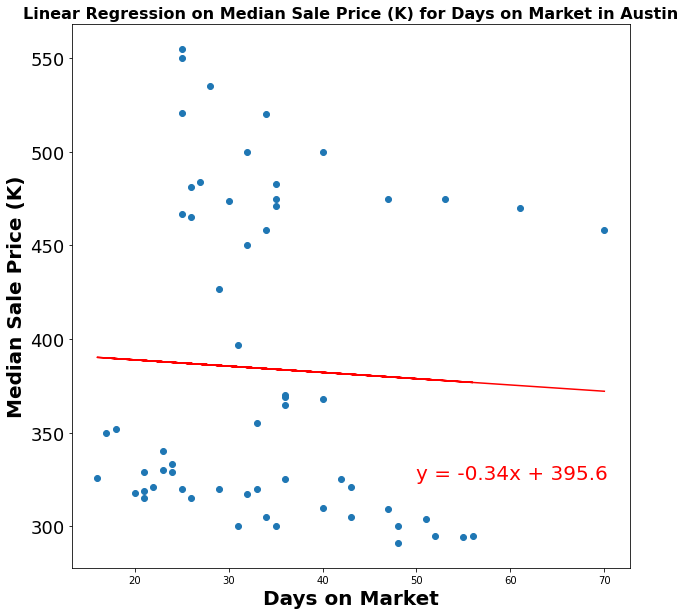

In [97]:
import scipy.stats as st
#Linear regression for Austin
x_values = austin_2018_2022["Days on Market"]
y_values = austin_2018_2022["Median Sale Price"]
#Add linear regression equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.figure(figsize=(10,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 325),fontsize=20,color="red")
plt.xlabel("Days on Market", fontsize = 20, fontweight= "bold")
plt.ylabel("Median Sale Price (K)", fontsize = 20, fontweight= "bold")
plt.title("Linear Regression on Median Sale Price (K) for Days on Market in Austin", fontsize = 16, fontweight= "bold")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.54384665350525
The correlation between both factors is -0.74


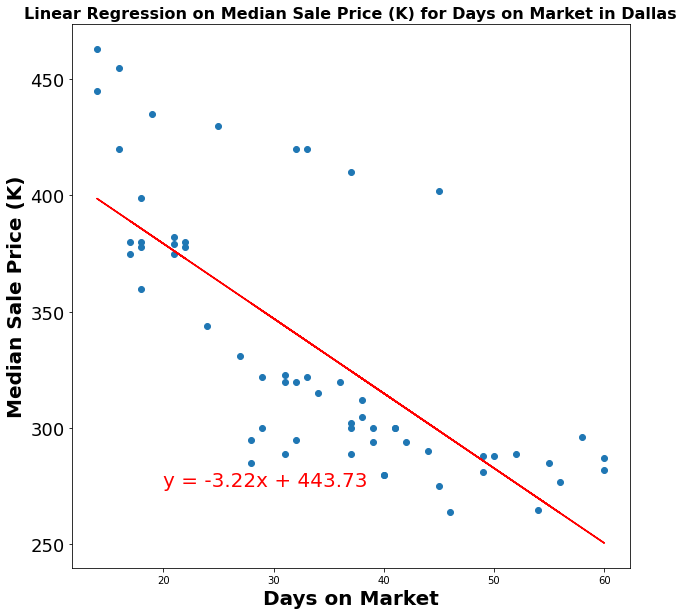

In [98]:
import scipy.stats as st
#Linear regression for Dallas
x_values = dallas_2018_2022["Days on Market"]
y_values = dallas_2018_2022["Median Sale Price"]
#Add linear regression equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.figure(figsize=(10,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 275),fontsize=20,color="red")
plt.xlabel("Days on Market", fontsize = 20, fontweight= "bold")
plt.ylabel("Median Sale Price (K)", fontsize = 20, fontweight= "bold")
plt.title("Linear Regression on Median Sale Price (K) for Days on Market in Dallas", fontsize = 16, fontweight= "bold")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

Discussion about the linear relationship for Days on Market vs Median Sale Price (K):
* From 2018-2022 in the Austin metro area, there is no correlation between Median Sale Price and Days on the Market. Reamining on the market longer does not decrease the sale price of the home. This could mean that people are willing the pay a higher price for a house that just entered the market. 
* However, in the Dallas metro area there is a moderate correlation between Median Sale Price and Days on the Market. The longer a home stays on the market, the lower the sale price. 